David Strube - dstrube3@gatech.edu

CS 6603 - AI, Ethics, and Society

Homework Project #2 - Stats 101

# Step 2 
## Explore the data by answering the following questions:
* Which dataset did you select?
* * deaths-in-custody
* How many observations are in the dataset?
* * 8373
* How many variables in the dataset?
* * 18
* Does this dataset seem to belong to a regulated domain in law as discussed in the lectures? If yes, which one?
* * No
* How many variables in the dataset are associated with a legally recognized protected class? In a table format, list those variables associated with a protected class, identify the protected class and the associated legal precedence/law as discussed in the lectures.
* * 3

|Variable |Protected Class |Law |
| --- | --- | --- |
|race |Race |Civil Rights Act of 1964 |
|gender |Sex |Civil Rights Act of 1964 |
|age |Age |Age Discrimination in Employment Act of 1967 |


In [1]:
#import numpy as np
import matplotlib.pyplot as plt
#allow plots to appear within the notebook:
%matplotlib inline
#import os
import pandas as pd
import itertools

print('All imports are good. Reading in the csv...')

df = pd.read_csv('deaths-in-custody.csv', sep=',')
print("Rows = {}".format(len(df.index)))
print("Columns = {}".format(len(df.columns)))
# shows top 10 rows
#df.head(10)
# shows bottom 10 rows
#df.tail(10)
# show info
#df.info()
# show counts of unique values
#df.nunique(axis=0)
# race                                          18
# gender                                         2
# age                                           84

All imports are good. Reading in the csv...
Rows = 8373
Columns = 18


# Step 3 
## Determine the relationships between dependent and independent variables
* The frequency of a value represents the number of times a value occurs in a data set. Compute the frequency of each value associated with each dependent variable (listed in Step 1) as a function of all of the protected class variables (independent variables) identified in Step 2. Create table(s) and histogram(s) comparing the frequency values of the dependent variable as a function of the independent variable. Hint: For variables that are continuous, you might consider creating intervals that represent the data. For categorical/ordinal/nominal values, you might consider converting to numerical values based on a reasonable (albeit subjective) ordering.

,races,Accidental,Cannot be Determined,Homicide Justified (Law Enforcement Staff),Homicide Justified (Other Inmate),Homicide Willful (Law Enforcement Staff),Homicide Willful (Other Inmate),Natural,Other,Suicide
0,Black,142.0,29.0,247.0,1.0,1.0,45.0,1348.0,65.0,94.0
1,Hispanic,247.0,26.0,573.0,2.0,0.0,71.0,1211.0,101.0,263.0
2,Other,29.0,8.0,81.0,0.0,0.0,16.0,234.0,19.0,80.0
3,White,265.0,52.0,368.0,0.0,3.0,97.0,2142.0,94.0,419.0


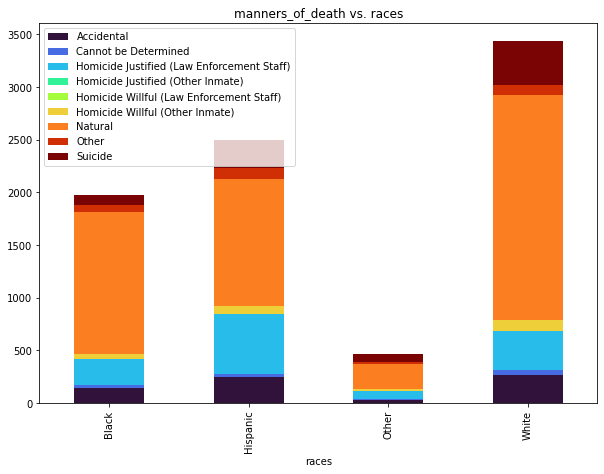

,races,Awaiting Booking,Booked - Awaiting Trial,Booked - No Charges Filed,Other,Sentenced
0,Black,20,211,43,382,1316
1,Hispanic,31,286,54,758,1365
2,Other,1,63,14,124,265
3,White,45,471,92,583,2249


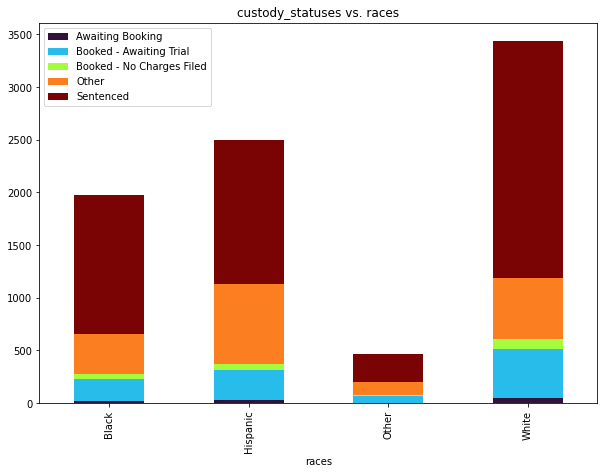

,gender,Accidental,Cannot be Determined,Homicide Justified (Law Enforcement Staff),Homicide Justified (Other Inmate),Homicide Willful (Law Enforcement Staff),Homicide Willful (Other Inmate),Natural,Other,Suicide
0,Female,55.0,9.0,49.0,0.0,0.0,3.0,281.0,16.0,58.0
1,Male,628.0,106.0,1220.0,3.0,4.0,226.0,4654.0,263.0,798.0


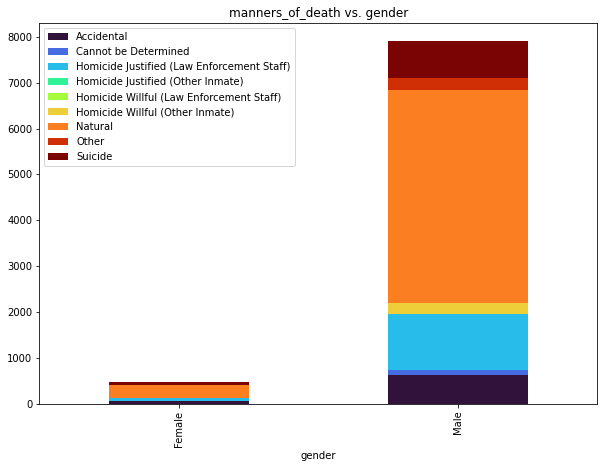

,gender,Awaiting Booking,Booked - Awaiting Trial,Booked - No Charges Filed,Other,Sentenced
0,Female,15,106,32,84,234
1,Male,82,925,171,1763,4961


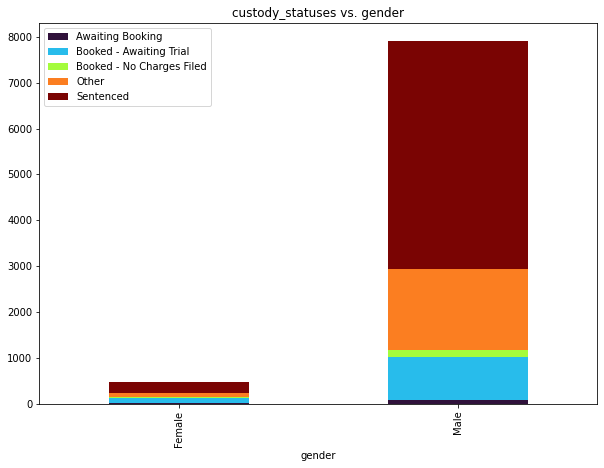

,age_groups,Accidental,Cannot be Determined,Homicide Justified (Law Enforcement Staff),Homicide Justified (Other Inmate),Homicide Willful (Law Enforcement Staff),Homicide Willful (Other Inmate),Natural,Other,Suicide
0,<40,347.0,59.0,892.0,2.0,4.0,96.0,442.0,148.0,482.0
1,>=40,336.0,56.0,377.0,1.0,0.0,133.0,4493.0,131.0,374.0


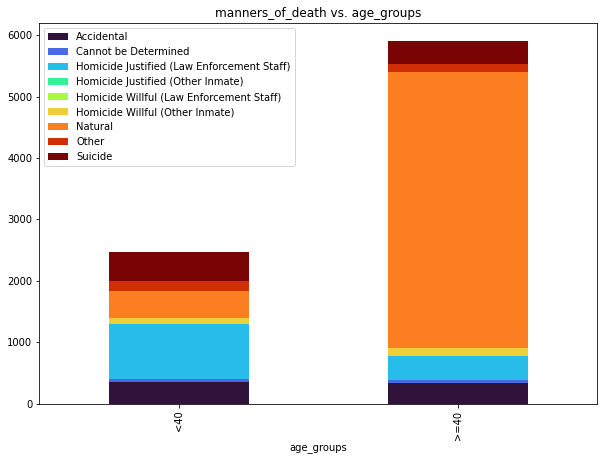

,age_groups,Awaiting Booking,Booked - Awaiting Trial,Booked - No Charges Filed,Other,Sentenced
0,<40,41,364,78,1212,777
1,>=40,56,667,125,635,4418


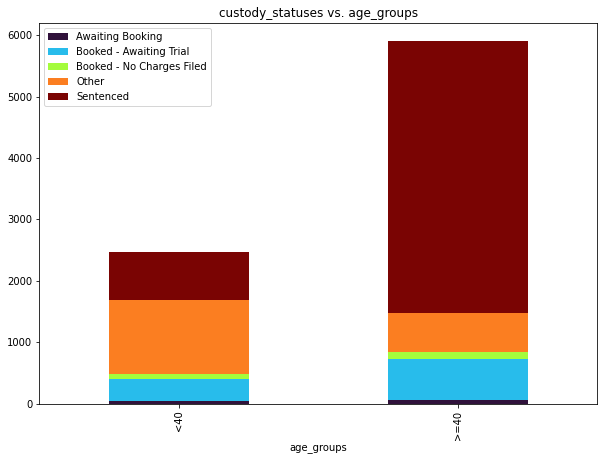

In [2]:
#If we want to include anything that's not a protected class:
#protected_classes = ['race', 'gender', 'age']
#dependent_variables = []
#for col in df.columns:
#    if col not in protected_classes:
#        dependent_variables.append(col)
#print('dependent_variables: ', end='')
#print(dependent_variables)

# New manners_of_death
df['manners_of_death'] = df['manner_of_death'].map(lambda value : 'Other' if value.lower() not in ['suicide','natural','accidental','cannot be determined'] and not value.lower().startswith('homicide') else value)

# New custody_statuses
df['custody_statuses'] = df['custody_status'].map(lambda value : 'Other' if value.lower() not in ['sentenced','awaiting booking','booked - awaiting trial','booked - no charges filed'] else value)

dependent_variables = ['manners_of_death','custody_statuses']

df['races'] = df['race'].map(lambda value: 'Other' if value.lower() not in ['black', 'white', 'hispanic'] else value)

unknown_age = 'Unk'
#Get average age
average_age = int(df[df.age != unknown_age].age.astype(float).mean())
#print('average_age:', end='')
#print(average_age) # about 48
#Make a new variable with just indices and ages; set any unknowns to the average
df['age_groups'] = df['age'].map(lambda value: str(average_age) if value == unknown_age else value).astype(int)
#print('Minimum age: ', end='')
#print(df['age_groups'].min(axis=0))
#print('Maximum age: ', end='')
#print(df['age_groups'].max(axis=0))

#Now that unknowns are handled (set to average), put all ages into one of two groups
df['age_groups'] = df['age_groups'].map(lambda value: '<40' if value < 40 else '>=40').astype(str)

#Reset protected_classes because we added the column age_groups
protected_classes = ['races', 'gender', 'age_groups']
#Pair up protected_classes & dependent_variables
pairs = list(itertools.product(protected_classes, dependent_variables)) 
#print('pairs:')
#print(pairs)

def print_frequencies(df, dependent_variable):
    #print('Independent Variable / Protected Class Variable | Dependent Variable: ' + dependent_variable)
    for col in df:
        #print('col: ', end='')
        #print(col)
        #print('df[col]: ')
        for dc in df[col]:
            #print(dc)
            # https://www.educba.com/python-print-table/
            break
        #print(df[col])
        break

for _, (prot_class, dep_var) in enumerate(pairs): 
    # Aggregate dataframe
    df_aggregate = df.groupby([prot_class, dep_var], as_index=False).size()
    # Pivot aggregate
    df_pivot = df_aggregate.pivot(index=prot_class, columns=dep_var) 
    # Remove size column values from legend
    df_pivot.columns = df_pivot.columns.droplevel(0)
    # Remove column name from legend
    df_pivot.columns.name = None
    # Reset index
    df_pivot = df_pivot.reset_index(drop=False).rename({"index": prot_class}, axis=1).fillna(0)
    # Get subplots
    _, ax = plt.subplots(1, 1, figsize=(10, 7), tight_layout=False)
    # Plot the pivot aggregate
    ax = df_pivot.plot(x=prot_class, kind="bar", stacked=True, title=f"{dep_var} vs. {prot_class}", 
                       colormap="turbo", ax=ax)
    print_frequencies(df_pivot, dep_var)
    display(df_pivot)
    # Show the graph
    plt.show()
    print("\n\n")
    #break


* Note that because the vast majority of race data was Black, White, or Hispanic, all other races were combined into one category, Other.

# Step 4 
## Show how to manipulate with data
Select one protected class variable (independent variable) and one dependent variable. 

Protected class variable: age

Dependent variable: manner_of_death

* Create a graph to support the “fairness” hypothesis: The system is fair. There is no difference in the outcomes. 

1) Fair Hypothesis: As seen from this graph, manners of death are not dependent on age. (Manipulations: Used stacked bar graph; From the manners_of_death column, removed all values except Accidental).


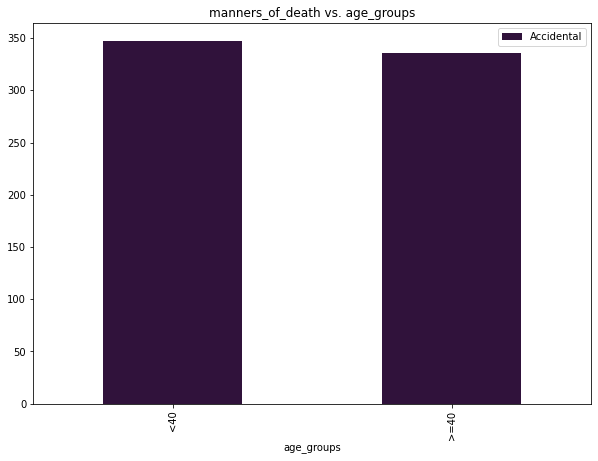

In [3]:
protected_class = 'age_groups'
dependent_variable = 'manners_of_death'
outcome = 'accidental'
df['manners_of_death'] = df['manner_of_death'].map(lambda value : None if value.lower() not in [outcome] else value)


for _, (prot_class, dep_var) in enumerate(pairs): 
    if prot_class != protected_class or dep_var != dependent_variable:
        #print('prot_class = ' + prot_class + '; dep_var = ' + dep_var)
        continue
    # Aggregate dataframe
    df_aggregate = df.groupby([prot_class, dep_var], as_index=False).size()
    # Pivot aggregate
    df_pivot = df_aggregate.pivot(index=prot_class, columns=dep_var) 
    # Remove size column values from legend
    df_pivot.columns = df_pivot.columns.droplevel(0)
    # Remove column name from legend
    df_pivot.columns.name = None
    # Reset index
    df_pivot = df_pivot.reset_index(drop=False).rename({"index": prot_class}, axis=1).fillna(0)
    # Get subplots
    _, ax = plt.subplots(1, 1, figsize=(10, 7), tight_layout=False)
    # Plot the pivot aggregate
    ax = df_pivot.plot(x=prot_class, kind="bar", stacked=True, title=f"{dep_var} vs. {prot_class}", 
                       colormap="turbo", ax=ax)
    # Show the graph
    plt.show()
    print("\n\n")


* Create a graph to support the bias hypothesis: The system is biased. There is a difference in the outcomes. For each, provide a brief description of your manipulations.

* 2) Bias Hypothesis: As seen from this graph, manners of death are significantly dependent on age. Specifically, there is a bias toward Homicide if age is less than 40, and a bias toward Natural if age is 40 or greater. (This hypothesis was easily supported with the data so didn’t require much in manipulations: Used stacked bar graph; Reset the manners_of_death dataframe).


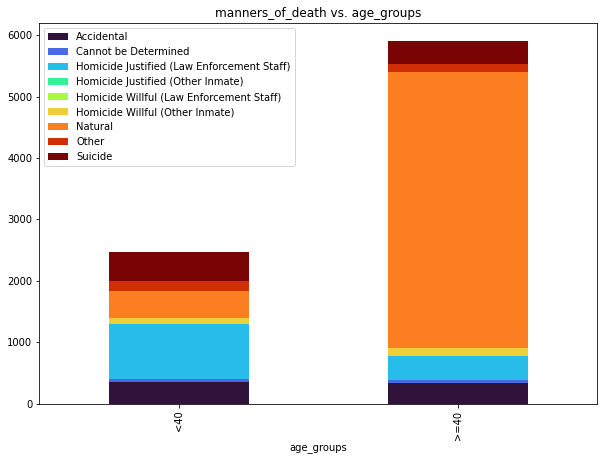

In [4]:
protected_class = 'age_groups'
dependent_variable = 'manners_of_death'
df['manners_of_death'] = df['manner_of_death'].map(lambda value : 'Other' if value.lower() not in ['suicide','natural','accidental','cannot be determined'] and not value.lower().startswith('homicide') else value)

for _, (prot_class, dep_var) in enumerate(pairs): 
    if prot_class != protected_class or dep_var != dependent_variable:
        #print('prot_class = ' + prot_class + '; dep_var = ' + dep_var)
        continue
    # Aggregate dataframe
    df_aggregate = df.groupby([prot_class, dep_var], as_index=False).size()
    # Pivot aggregate
    df_pivot = df_aggregate.pivot(index=prot_class, columns=dep_var) 
    # Remove size column values from legend
    df_pivot.columns = df_pivot.columns.droplevel(0)
    # Remove column name from legend
    df_pivot.columns.name = None
    # Reset index
    df_pivot = df_pivot.reset_index(drop=False).rename({"index": prot_class}, axis=1).fillna(0)
    # Get subplots
    _, ax = plt.subplots(1, 1, figsize=(10, 7), tight_layout=False)
    # Plot the pivot aggregate
    ax = df_pivot.plot(x=prot_class, kind="bar", stacked=True, title=f"{dep_var} vs. {prot_class}", 
                       colormap="turbo", ax=ax)
    # Show the graph
    plt.show()
    print("\n\n")


# Step 5

* Given your selected protected class variable (independent variable), calculate the average (using mean, median, and mode) of the protected class group (Hint: Variables might need to be converted to numerical values as needed). Run the random sampling method using 50% of the data to create a reduced dataset. Calculate the average (mean, median, and mode) of the protected class group. Indicate if there is a difference (or not) between the original dataset and the reduced dataset for any of the averages.  Provide all results.

In [5]:
protected_class = 'age_groups'
dependent_variable = 'manners_of_death'
average_age = int(df[df.age != unknown_age].age.astype(float).mean())
print('Protected class variable: Age')
print('Original dataset average: ', end='')
print(average_age) # 48
median_age = int(df[df.age != unknown_age].age.astype(float).median())
print('Original dataset median: ', end='')
print(median_age) # 49
mode_age = int(df[df.age != unknown_age].age.astype(float).mode())
print('Original dataset mode: ', end='')
print(mode_age) # 53

def percent_diff(original, sample):
    diff = abs(original - sample)
    if diff == 0:
        return '0% difference'
    # https://www.calculatorsoup.com/calculators/algebra/percent-difference-calculator.php
    added = original + sample
    return str(int(diff/(added / 2) * 100)) + "% difference"

df_sample = df.sample(frac=.50, replace=False)
#display(df_sample[[protected_class, dependent_variable]]) 
average_age_sample = int(df_sample[df_sample.age != unknown_age].age.astype(float).mean())
print('Sample dataset average: ', end='')
print(average_age_sample, end='') # 
print(', ' + percent_diff(average_age, average_age_sample))

median_age_sample = int(df_sample[df_sample.age != unknown_age].age.astype(float).median())
print('Sample dataset median: ', end='')
print(median_age_sample, end='') # 
print(', ' + percent_diff(median_age, median_age_sample))

mode_age_sample = int(df_sample[df_sample.age != unknown_age].age.astype(float).mode())
print('Sample dataset mode: ', end='')
print(mode_age_sample, end='') # 
print(', ' + percent_diff(mode_age, mode_age_sample))



Protected class variable: Age
Original dataset average: 48
Original dataset median: 49
Original dataset mode: 53
Sample dataset average: 48, 0% difference
Sample dataset median: 49, 0% difference
Sample dataset mode: 51, 3% difference


# Step 6
* Given your reduced dataset from Step 5, Repeat Step 3 (frequency and histogram) using your selected dependent variable as a function of your selected independent variable (from Step 4).  Explain any differences (in at least 2 sentences). If you used the random sampling method, would members associated with the protected class variable benefit or be harmed? Explain your reasoning (in at least 2 sentences).

,age_groups,Accidental,Cannot be Determined,Homicide Justified (Law Enforcement Staff),Homicide Justified (Other Inmate),Homicide Willful (Law Enforcement Staff),Homicide Willful (Other Inmate),Natural,Other,Suicide
0,<40,183.0,33.0,463.0,1.0,2.0,51.0,213.0,66.0,265.0
1,>=40,166.0,28.0,180.0,1.0,0.0,62.0,2216.0,73.0,183.0


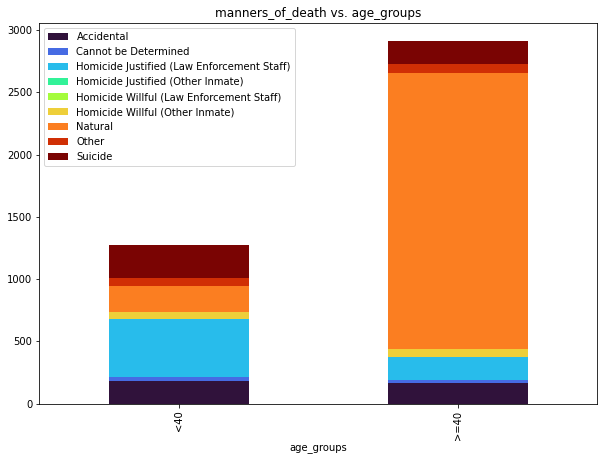




Differences: The main difference in the graph from step 6 from the equivalent ones in steps 3 and 4 is the count of 
samples. This is obvious and to be expected with a random sampling of 50%. Other than that, there are no significant differences. The proportions in all the trends are nearly identical.



Having used the random sampling method, members associated with the protected class variable (age) would neither 
benefit nor be harmed in the case of the dependent variable (manner_of_death). There seems to be no change in any 
trends. This may or may not hold true for other protected class variables or other dependent variables.


In [6]:
protected_class = 'age_groups'
dependent_variable = 'manners_of_death'

# Aggregate dataframe
df_aggregate_sample = df_sample.groupby([protected_class, dependent_variable], as_index=False).size()
# Pivot aggregate
df_pivot_sample = df_aggregate_sample.pivot(index=protected_class, columns=dependent_variable) 
# Remove size column values from legend
df_pivot_sample.columns = df_pivot_sample.columns.droplevel(0)
# Remove column name from legend
df_pivot_sample.columns.name = None
# Reset index
df_pivot_sample = df_pivot_sample.reset_index(drop=False).rename({"index": protected_class}, axis=1).fillna(0)
# Get subplots
_, ax_sample = plt.subplots(1, 1, figsize=(10, 7), tight_layout=False)
# Plot the pivot aggregate
ax_sample = df_pivot_sample.plot(x=protected_class, kind="bar", stacked=True, 
                                 title=f"{dependent_variable} vs. {protected_class}", colormap="turbo", ax=ax_sample)
print_frequencies(df_pivot_sample, dependent_variable)
display(df_pivot_sample)
# Show the graph
plt.show()
print('\n\n')

print('Differences: The main difference in the graph from step 6 from the equivalent ones in steps 3 and 4 is the count of \nsamples. This is obvious and to be expected with a random sampling of 50%. Other than that, there are no significant differences. The proportions in all the trends are nearly identical.')
print('\n\n')

print('Having used the random sampling method, members associated with the protected class variable (age) would neither \nbenefit nor be harmed in the case of the dependent variable (manner_of_death). There seems to be no change in any \ntrends. This may or may not hold true for other protected class variables or other dependent variables.')

